# **TRỰC QUAN HÓA DỮ LIỆU CHỨNG KHOÁN SỬ DỤNG BIỂU ĐỒ DẠNG NẾN**

<img src='https://forexpops.com/wp-content/uploads/2018/08/Forex-candlestick-patterns-cheat-sheet.png'>

[link giải thích](https://chungkhoanonline.vn/huong-dan-phan-tich-ky-thuat-cach-doc-bieu-do-nen-nhat-phan-1/)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly #thư viện dùng để tương tác trực tiếp với chart
import cufflinks as cf #thư viện dùng để kết nối pandas vs plotly
cf.go_offline() #có thể dùng cufflinks offline

In [2]:
import plotly.io as pio
pio.renderers.default = 'colab'

## 1. Đọc dữ liệu
---

In [3]:
import datetime
start = datetime.datetime(2015,1,1)
end = datetime.datetime.now()

In [4]:
from pandas_datareader import data, wb
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

RemoteDataError: ignored

In [ ]:
BAC.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1560 entries, 2015-01-02 to 2021-03-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1560 non-null   float64
 1   Low        1560 non-null   float64
 2   Open       1560 non-null   float64
 3   Close      1560 non-null   float64
 4   Volume     1560 non-null   float64
 5   Adj Close  1560 non-null   float64
dtypes: float64(6)
memory usage: 85.3 KB


In [ ]:
BAC.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1560.000000,1560.000000,1560.000000,1560.000000,1.560000e+03,1560.000000
mean,24.280212,23.766699,24.025692,24.024763,7.627923e+07,22.618740
std,6.448468,6.357508,6.400591,6.403471,3.679052e+07,6.501645
min,11.550000,10.990000,11.460000,11.160000,1.380540e+07,10.064300
25%,17.325000,16.969999,17.160000,17.129999,5.205452e+07,15.428673
50%,24.950001,24.375000,24.670000,24.680000,6.717135e+07,23.503276
75%,29.530001,28.990000,29.309999,29.290001,8.965208e+07,27.834428
max,38.180000,37.580002,38.029999,37.939999,3.750887e+08,37.939999


In [ ]:
qf = cf.QuantFig(BAC,legend='top',name='BAC')
qf.add_sma([144],width=1,color=['red'])
qf.add_volume()
qf.iplot()
# SMA là đường trung bình giá của 144 ngày gần nhất = (n1+n2 + ... + n144)/144
# Biểu đồ sử dụng là biểu đồ nến(candle stick) phổ biến trong tài chính
# QuantFig là class thuộc thư viện cufflinks

## 2. Các dạng biểu đồ nến với Plotly
---
### 2.1) Simple Candlestick with Pandas

In [ ]:
import plotly.graph_objects as go
import pandas as pd
df = BAC
fig = go.Figure(data=[go.Candlestick(
    x=df.index,
    open=df['Open'], high=df['High'],
    low=df['Low'], close=df['Close'])])

fig.show()
#sử dụng các tham số mặc định để hiển thị

In [ ]:
#Candlestick without Rangeslider
fig = go.Figure(data=[go.Candlestick(
    x=df.index, open=df['Open'], high=df['High'],
    low=df['Low'], close=df['Close'])])

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [ ]:
#Tùy chỉnh màu sắc Custom Candlestick Colors

df = JPM
fig = go.Figure(data=[go.Candlestick(
    x=df.index,
    open=df['Open'], high=df['High'],
    low=df['Low'], close=df['Close'],
    increasing_line_color= 'blue', decreasing_line_color= 'black'
)])

fig.show()

In [ ]:
#Ohlc chart
fig = go.Figure(data=[go.Ohlc(
    x=df.index, open=df['Open'], high=df['High'],
    low=df['Low'], close=df['Close'])])

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

# PHÂN TÍCH DỮ LIỆU CHỨNG KHOÁN
---
* Shopify is a multinational Canadian e-commerce company with headquarters in Ottawa, Ontario that was founded in 2004. The company offers business e-commerce platforms for online stores, including payments, marketing, shipping and customer engagement tools to simplify the process of running an online store for small merchants. In 2019 Shopify announced reaching over 1,000,000 businesses in approximately 175 countries. 

* JD.com is an e-commerce Chinese company headquartered in Beijing that was founded in 1998. It is one of two huge business-to-consumer online retailers, a member of Fortune Global 500 with a total revenue of 67 billion in 2018.

* Alibaba is the second top e-commerce and technology company in China and a major competitor to JD.com. It was created in 1999 and it's now headquartered in Hangzhou. The company offers sales services via web portals such as business-to-business, business-to-consumer, and consumer-to-consumer, as well as electronic payment services, shopping search engines, and cloud computing services. It' revenue in 2019 was over $56 billion.

[link Kaggle](https://www.kaggle.com/alenavorushilova/stock-market-time-series-data-analysis?scriptVersionId=27934989)

In [ ]:
#importing all of the neccesary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import pandas_datareader
import datetime

import pandas_datareader.data as web

In [ ]:
#creating a start and an end dates:
start = datetime.datetime(2016,1,1)
end = datetime.datetime.today()

In [ ]:
#Lấy dữ liệu về cổ phiếu của các công ty
#Shopify
shop = web.DataReader("SHOP", "yahoo", start, end)
shop.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,25.834999,24.520000,25.420000,25.719999,601800,25.719999
2016-01-05,26.500000,25.260000,25.500000,25.309999,418200,25.309999
2016-01-06,25.340000,24.180000,24.950001,25.299999,256600,25.299999
2016-01-07,25.580000,24.629999,25.000000,24.670000,416000,24.670000
2016-01-08,25.370001,24.700001,25.000000,24.930000,137400,24.930000


In [ ]:
#JD.com
jd = web.DataReader('JD', 'yahoo', start, end)
jd.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,30.660000,29.000000,30.660000,29.530001,18265300,29.530001
2016-01-05,30.299999,29.600000,30.049999,30.000000,9426400,30.000000
2016-01-06,30.030001,29.049999,29.230000,29.760000,12988900,29.760000
2016-01-07,29.150000,27.650000,28.340000,27.950001,18155700,27.950001
2016-01-08,28.900000,27.469999,28.580000,27.620001,15164100,27.620001


In [ ]:
#Alibaba
alibaba = web.DataReader('BABA', 'yahoo', start, end)
alibaba.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,78.309998,75.180000,78.180000,76.690002,23066300,76.690002
2016-01-05,78.680000,77.260002,77.919998,78.629997,14258900,78.629997
2016-01-06,78.485001,76.970001,77.120003,77.330002,11569300,77.330002
2016-01-07,75.500000,71.540001,73.290001,72.720001,27288100,72.720001
2016-01-08,74.660004,70.669998,74.330002,70.800003,20814600,70.800003


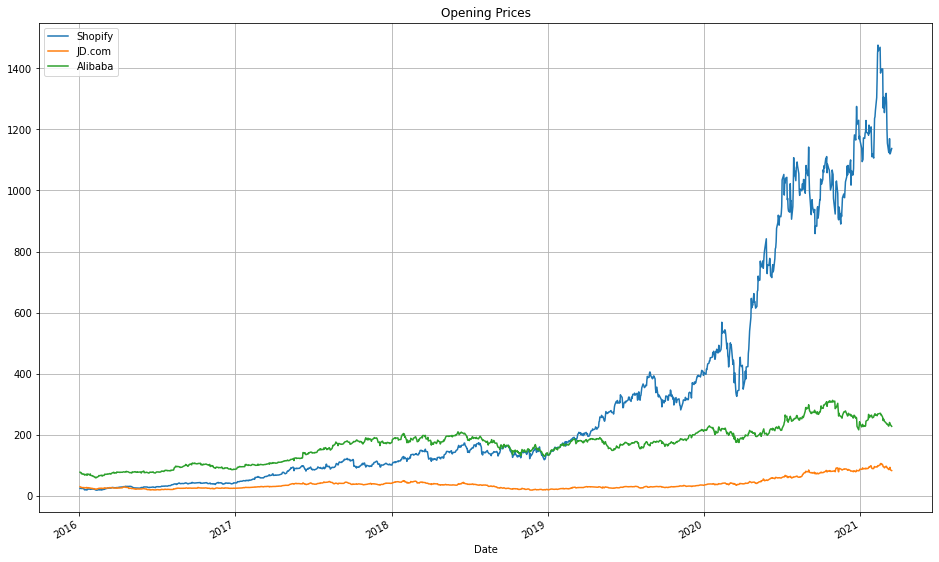

In [ ]:
shop['Open'].plot(label = 'Shopify', figsize = (16,10), title = 'Opening Prices')
jd['Open'].plot(label = 'JD.com')
alibaba['Open'].plot(label = 'Alibaba')
plt.legend(loc = 'best')
plt.grid(True)
plt.show()

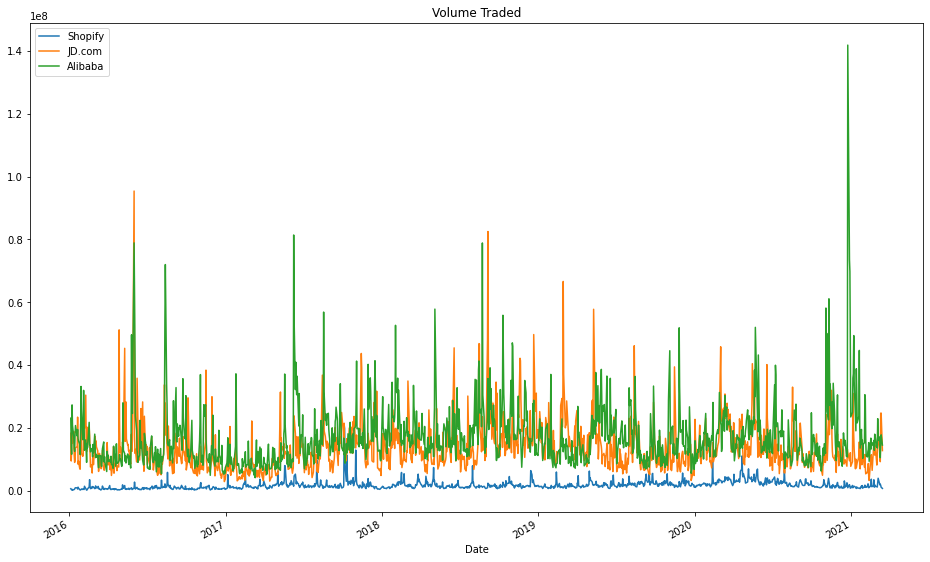

In [ ]:
shop['Volume'].plot(label = 'Shopify', figsize = (16,10), title = 'Volume Traded')
jd['Volume'].plot(label = 'JD.com')
alibaba['Volume'].plot(label = 'Alibaba')
plt.legend();

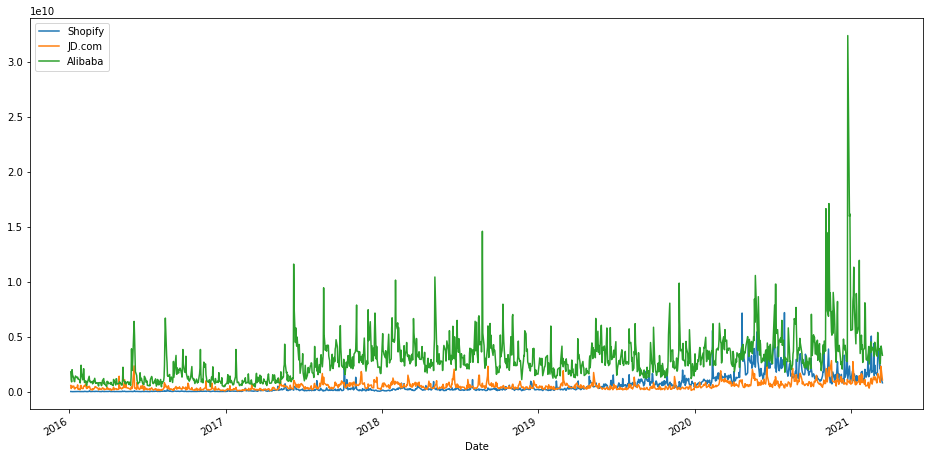

In [ ]:
shop['Total Traded'] = shop['Open']*shop['Volume']
jd['Total Traded'] = jd['Open']*jd['Volume']
alibaba['Total Traded'] = alibaba['Open']*alibaba['Volume']

shop['Total Traded'].plot(figsize = (16,8), label = 'Shopify')
jd['Total Traded'].plot(figsize = (16,8), label = 'JD.com')
alibaba['Total Traded'].plot(figsize = (16,8), label = 'Alibaba')
plt.legend(loc = 'best')

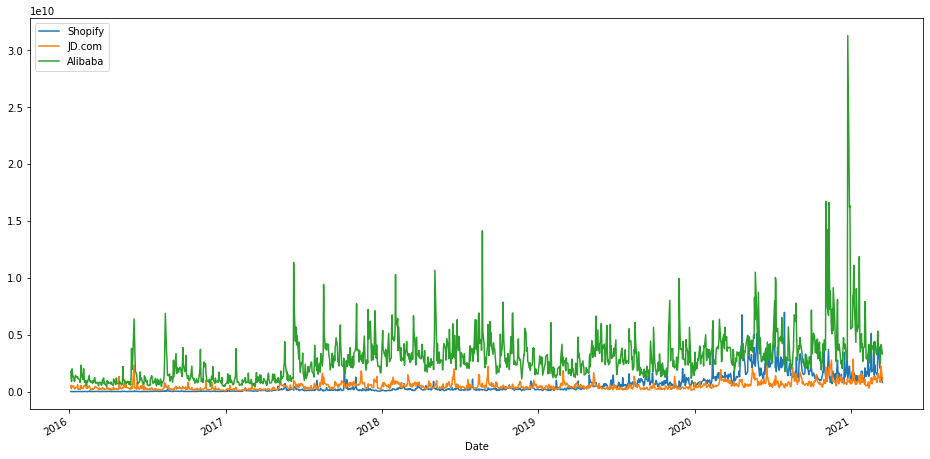

In [ ]:
shop['Avg'] = shop[['High', 'Low']].mean(axis=1)
jd['Avg'] = jd[['High', 'Low']].mean(axis=1)
alibaba['Avg'] = alibaba[['High', 'Low']].mean(axis=1)

shop['Total Traded New'] = shop['Avg']*shop['Volume']
jd['Total Traded New'] = jd['Avg']*jd['Volume']
alibaba['Total Traded New'] = alibaba['Avg']*alibaba['Volume']

shop['Total Traded New'].plot(figsize = (16,8), label = 'Shopify')
jd['Total Traded New'].plot(figsize = (16,8), label = 'JD.com')
alibaba['Total Traded New'].plot(figsize = (16,8), label = 'Alibaba')
plt.legend(loc = 'best');

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import pandas_datareader
import datetime

import pandas_datareader.data as web

In [6]:
#creating a start and an end dates:
start = datetime.datetime(2016,1,1)
end = datetime.datetime.today()

In [7]:
#Shopify
shop = web.DataReader("SHOP", "yahoo", start, end)
shop.head()

RemoteDataError: ignored

In [8]:
#JD.com
jd = web.DataReader('JD', 'yahoo', start, end)
jd.head()

RemoteDataError: ignored

In [9]:
alibaba = web.DataReader('BABA', 'yahoo', start, end)
alibaba.head()


RemoteDataError: ignored